In [127]:
#3.3 Big-O Notation self-check
import random
import sys
import matplotlib.pyplot as plt
import time

def time_func(func):
    def inner(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        elapsed = end-start
        return elapsed, result
    return inner
        

In [38]:
nums = random.sample(range(99), 99)
@time_func
def find_min_quadratic(nums):
    min_val = None
    for i in range(len(nums)):
        curr = nums[i]
        is_min = True 
        for j in range(len(nums)):
            if curr > nums[j]:
                is_min = False
        if is_min:
            min_val = curr
    return min_val 

@time_func
def find_min_linear(nums):
    min_val = sys.maxsize
    for i in range(len(nums)):
        if nums[i] < min_val:
            min_val = nums[i]
    return min_val

assert find_min_linear(nums)[1] == find_min_quadratic(nums)[1]

In [125]:
#prove that it is of quadratic and linear time? plot it...
#x sizes
X = list(range(1000, 10001, 1000))
Y1 = [] #quadratic
Y2 = [] #linear
for x in X:
    x_range = list(range(x))
    t_1, _ = find_min_quadratic(x_range)
    t_2, _ = find_min_linear(x_range)
    Y1.append(t_1)
    Y2.append(t_2)


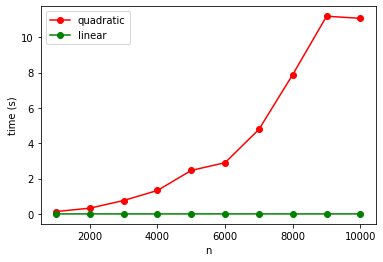

In [126]:
plt.plot(X, Y1, color='red', marker='o', label='quadratic')
plt.plot(X, Y2, color='green', marker='o', label='linear')
plt.xlabel('n')
plt.ylabel('time (s)')
plt.legend()

In [74]:
#3.11 Programming Exercises
from timeit import Timer
"""timeit designed to make cross-platform timing experiments - 
requires two statements:
1. the python statement you want to time
2. statement that will run once to setup the test"""

Text(0, 0.5, 'time(s)')

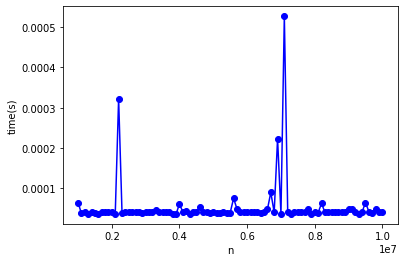

In [90]:

#Ex1. Devise an experiment to verify that the list index operator is O(1)
X = []
Y = []
for size in range(1_000_000, 1_000_000_1, 1_000_00):
    x = list(range(size))
    t = Timer(f"x[{random.randint(0, size-1)}]", "from __main__ import x")
    X.append(size)
    Y.append(t.timeit(number=1000))

plt.plot(X, Y, color='blue', marker='o')
plt.xlabel('n')
plt.ylabel('time(s)')


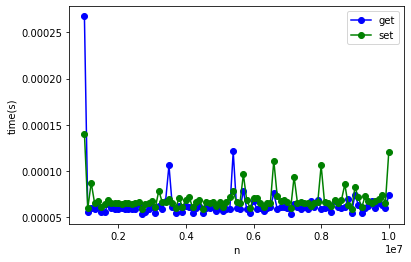

In [96]:
#Ex2. Devise an experiment to verify that the get and set on dict is O(1)
X = []
Y1 = [] #get
Y2 = [] #set
for size in range(1_000_000, 1_000_000_1, 1_000_00):
    x = dict({i: None for i in range(size)})
    t1 = Timer(f"x[{random.randint(0, size-1)}]", "from __main__ import x")
    t2 = Timer(f"x[{random.randint(0, size-1)}] = 1", "from __main__ import x")

    X.append(size)
    Y1.append(t1.timeit(number=1000))
    Y2.append(t2.timeit(number=1000))

plt.plot(X, Y1, color='blue', marker='o', label='get')
plt.plot(X, Y2, color='green', marker='o', label='set')
plt.xlabel('n')
plt.ylabel('time(s)')
plt.legend()

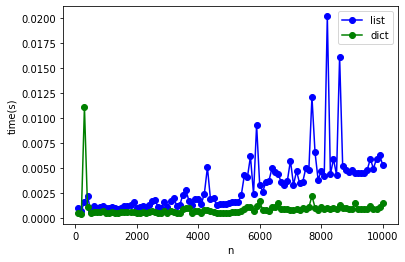

In [124]:
#Ex3. Compare the performance of del operator on list and dict
X = []
Y1 = [] #del list
Y2 = [] #del dict
for size in range(100, 10_001, 100):
    times1 = []
    times2 = []
    for _ in range(1000):
        lst = list(range(size))
        dct = dict({i: None for i in range(size)})
        t1 = Timer(f"del lst[{random.randint(0, size-1)}]", "from __main__ import lst")
        t2 = Timer(f"del dct[{random.randint(0, size-1)}]", "from __main__ import dct")
        times1.append(t1.timeit(number=1))
        times2.append(t2.timeit(number=1))
    X.append(size)
    Y1.append(sum(times1))
    Y2.append(sum(times2))

plt.plot(X, Y1, color='blue', marker='o', label='list')
plt.plot(X, Y2, color='green', marker='o', label='dict')
plt.xlabel('n')
plt.ylabel('time(s)')
plt.legend()

Text(0, 0.5, 'time(s)')

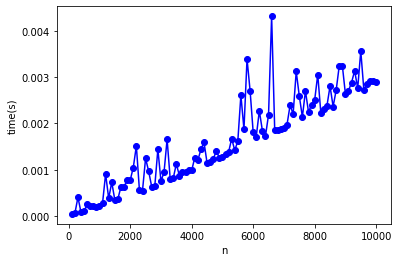

In [383]:
#Given a list of numbers in random order, write an algorithm that works in O(nlog(n)) to find the kth smallest number in the list 
def find_kth_min(nums, k=None):
    assert 1 <= k <= len(nums)
    #sort - nlog(n) operation
    nums.sort()
    return nums[k-1]

X = []
Y = []    
for size in range(100, 10_001, 100):
    x = random.sample(range(size), size)
    t1 = Timer(f"find_kth_min(x, k={random.randint(1, size-1)})", "from __main__ import find_kth_min, x")
    X.append(size)
    Y.append(t1.timeit(number=1))

plt.plot(X, Y, color='blue', marker='o', label='find_kth_min')
plt.xlabel('n')
plt.ylabel('time(s)')


#### Can you improve the algorithm from previous problem to linear time? explain.

Yes it is possible... (watch this video on using partitioning to solve this problem 
https://www.youtube.com/watch?v=hGK_5n81drs&ab_channel=BackToBackSWE)
essentially, in the previous method we are DOING TOO MUCH WORK! What sorting does is finding the final position of all numbers in the list 
in the correct order, but that isn't actually necessary... To find the kth minimum number, we only have to locate the kth number in the list, with all other numbers
larger or greater on either side of it. So through partitioning it's possible to achieve this in linear time. We can adapt the partition function of quicksort to get quickselect to achieve this.

In [385]:

def partition(nums, left, right):
    #uses last value as pivot 
    pivot_idx = random.randint(left, right)
    nums[pivot_idx], nums[right] = nums[right], nums[pivot_idx]
    pivot = nums[right]
    i = j  = left
    #i keeps track of the boundary of numbers smaller than pivot
    #j scans the list so advances by one every iteration
    while j < right:
        if nums[j] <= pivot:
            nums[i], nums[j] = nums[j], nums[i]
            i += 1
        j += 1
    nums[right], nums[i] = nums[i], nums[right]
    return i


#adapt partitioning to find kth min
def quickSelect(nums, k=None):
    assert 1 <= k <= len(nums)
    k_pos = k-1 
    i = None
    left = 0
    right = len(nums)-1
    while True:
        #make sure to do function in place - returning nums reduces speed massively
        i = partition(nums, left, right)
        if i == k_pos:
            return nums[i]
        #the new slice you're working with is the unsorted left/right side partition of the pivot 
        if i > k_pos:
            #do not set left = 0 here! That defeats the purpose of partitioning - progressively getting smaller slice
            right = i - 1
        elif i < k_pos:
            left = i + 1
    return nums[i]



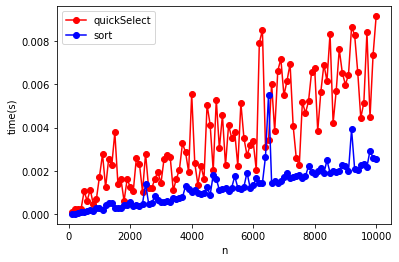

In [391]:
#Comparing quickSelect and sort
X = []
Y1 = []
Y2 = []    
for size in range(100, 10_001, 100):
    x = random.sample(range(size), size)
    t1 = Timer(f"quickSelect(x, k={random.randint(1, size-1)})", "from __main__ import quickSelect, x")
    t2 = Timer(f"find_kth_min(x, k={random.randint(1, size-1)})", "from __main__ import find_kth_min, x")

    X.append(size)
    Y1.append(t1.timeit(number=1))
    Y2.append(t2.timeit(number=1))

plt.plot(X, Y1, color='red', marker='o', label='quickSelect')
plt.plot(X, Y2, color='blue', marker='o', label='sort')
plt.xlabel('n')
plt.ylabel('time(s)')
plt.legend()

In practice, Quickselect's runtime was often slightly worse or same as that of sort. Perhaps given the possible coefficients quickselect is better at large sample sizes?